Valor medio teórico: -0.3333333333333333
Varianza teórica: 0.05555555555555555
Media simulada: -0.33547546805629797
Varianza simulada: 0.05424021031166035


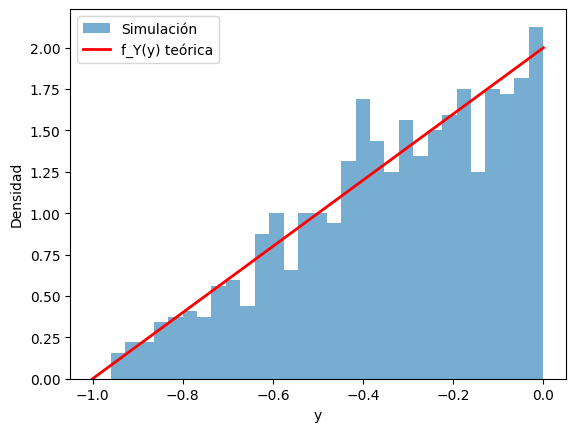

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# a) media(Y) 
E_Y = ( (0**3 + 1**3)/3 ) - 0.5 
E_Y = -1/3
#var(Y) = E[Y^2] - (E[Y])^2
E_Y2 = 1/6
Var_Y = E_Y2 - E_Y**2

print("Valor medio teórico:", E_Y)
print("Varianza teórica:", Var_Y)

# (b) Función inversa
def g(u):
    return np.sqrt(u) - 1

# (c) 
n = 1000
X = np.random.rand(n)  # uniforme(0,1)
Y = g(X)

# (d)
media_sim = np.mean(Y)
var_sim = np.var(Y)

print("Media simulada:", media_sim)
print("Varianza simulada:", var_sim)

y_vals = np.linspace(-1, 0, 200)
f_y = 2*(y_vals + 1)

plt.hist(Y, bins=30, density=True, alpha=0.6, label="Simulación")
plt.plot(y_vals, f_y, 'r-', lw=2, label="f_Y(y) teórica")
plt.xlabel("y")
plt.ylabel("Densidad")
plt.legend()
plt.show()

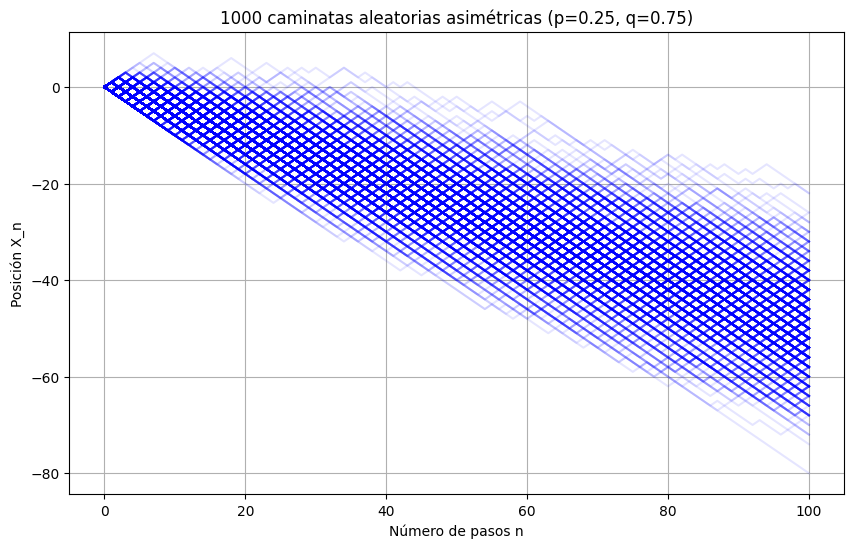

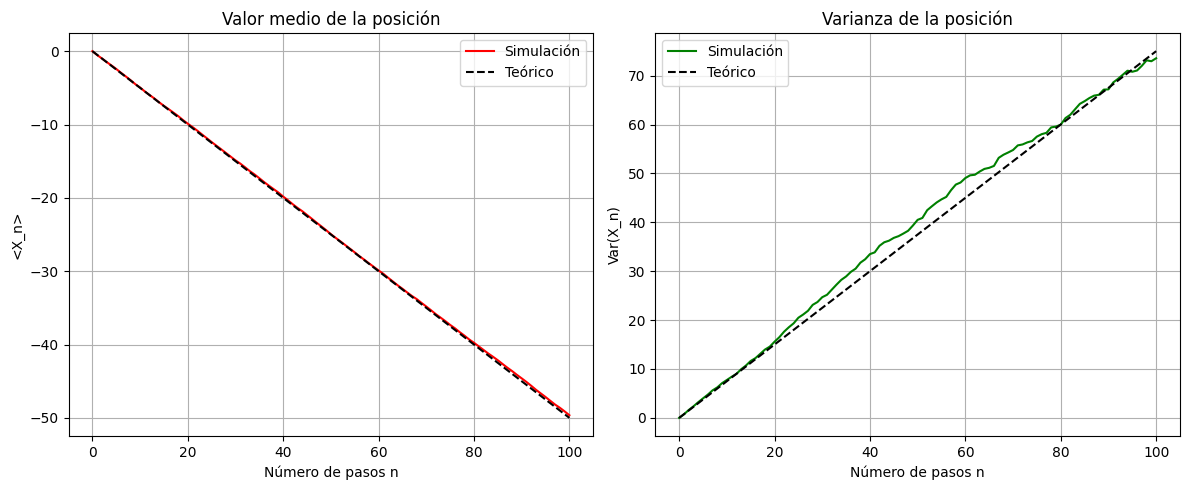

In [3]:
import numpy as np
import matplotlib.pyplot as plt

I = 1000   # número de caminatas
N = 100    # número de pasos por caminata
p = 1/4    # probabilidad de moverse a la derecha
q = 1 - p  # probabilidad de moverse a la izquierda

X = np.zeros((I, N+1))

for i in range(I):
    for n in range(1, N+1):
        paso = 1 if np.random.rand() < p else -1  # paso a la derecha o izquierda
        X[i, n] = X[i, n-1] + paso

X_mean = np.mean(X, axis=0)
X_var = np.var(X, axis=0)

n_values = np.arange(N+1)
mean_theory = (p - q) * n_values     # <X_n> teórico
var_theory = 4 * p * q * n_values    # Var(X_n) teórico (porque paso = ±1)

# 1. Caminatas individuales
plt.figure(figsize=(10,6))
for i in range(I):
    plt.plot(n_values, X[i], alpha=0.1, color="blue")
plt.xlabel("Número de pasos n")
plt.ylabel("Posición X_n")
plt.title(f"{I} caminatas aleatorias asimétricas (p={p}, q={q})")
plt.grid(True)
plt.show()

# 2. Promedio y varianza
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(n_values, X_mean, label="Simulación", color="red")
plt.plot(n_values, mean_theory, "--", label="Teórico", color="black")
plt.xlabel("Número de pasos n")
plt.ylabel("<X_n>")
plt.title("Valor medio de la posición")
plt.legend()
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(n_values, X_var, label="Simulación", color="green")
plt.plot(n_values, var_theory, "--", label="Teórico", color="black")
plt.xlabel("Número de pasos n")
plt.ylabel("Var(X_n)")
plt.title("Varianza de la posición")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()